# Assignment 2
## 2018 Kaggle ML & DS Survey Challenge

- Name: YIFAN ZHANG
- Student Number: 1004245952

## Import basic package

In [1]:
!pip install msgpack
!pip install pandas
!pip install sklearn
!pip install numpy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/zhangyifan/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgra

In [144]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

 - Visualization Setting

In [439]:
pd.options.display.max_columns = 12
pd.options.display.max_rows = 20
plt.rcParams['figure.dpi'] = 100

## Importing and Data Cleaning
- Import Kaggle_Salary.csv file
- Since the second row is the description of the specific question, we drop the second row and take the first row as title

In [440]:
salary = pd.read_csv('Kaggle_Salary.csv', skiprows = [1])
salary.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (209,323,372,385,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,...,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,2,434,Male,-1,30-34,Indonesia,...,NaN,NaN,NaN,NaN,-1,0.0
1,3,718,Female,-1,30-34,United States of America,...,NaN,NaN,NaN,NaN,-1,1.0
2,5,731,Male,-1,22-24,India,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
3,7,959,Male,-1,35-39,Chile,...,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0
4,8,1758,Male,-1,18-21,India,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


- As the former chart displayed, there are actually three columns represent the index. We select the last column provided by TA as index and drop the first column and the last column

In [220]:
# salary=salary.rename(columns = {'Unnamed: 396':'index'})
salary['index'] = salary['index'].astype(int)
salary.set_index('index')
df = salary.drop(columns=['Unnamed: 0', 'index'])

- Then we observe that there are generally two types of features: categorical features and numerical features.
- As for numerical features:
    - titles of features contain "OTHER_TEXT" are meaningless for analyzing which should be dropped
    - other numerical features are copied to new DataFrame called newDF
- As for categorical features, we create new column for each category and rename the title of the column to the former name appended with the category name. 
    - For example, if the feature's title is "Q1" and the answer if "Female", the new splitting feature's title is "Q1_Female". By this way, it clear to traceback each column by its title.

In [225]:
# obj_df = df.select_dtypes(include=['object']).copy()
newDF = pd.DataFrame()

for col in df:
    
    # For numerical features
    if df[col].dtypes != 'object':        
        if "OTHER" in col or "TEXT" in col:
            continue
        else:
            newDF[col] = df[col]
            continue
    
    cate = df[col].value_counts()
    cate_num = cate.size
      
    # For categorical features
    if(cate_num <= 0 or cate_num >= 70):
        continue
        
    # Only one category, encode feature as 1 and nan value as 0
    if(cate_num == 1):
        name = col + "_" + cate.index[0]
        newDF[name] = df[col].notnull().astype('int')
    
    # Multiple categories, using One Hot Encoder
    if(cate_num > 1):
        dummies = pd.get_dummies(df[col], prefix = col)
        newDF = pd.concat([newDF, dummies], axis=1, sort=False)
                      

In [441]:
newDF[0:5]

,Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,...,Q50_Part_3_Requires too much technical knowledge,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me,Q50_Part_8_Other
1,1,0,0,0,0,0,...,0,0,0,0,0,0
2,0,1,0,0,0,1,...,0,0,1,0,0,0
3,0,1,0,0,0,0,...,0,0,0,1,0,0
4,0,1,0,0,1,0,...,0,0,1,0,0,0
5,0,1,0,0,0,0,...,0,1,0,0,0,0


- Also the feature 'Time from Start to Finish (seconds)', which records the time spending on questionnaires, has little relation to do with compensation. So we drop this column'

- After go through the whole dataset, we find that there are still some NAN value in specific columns and rows. 
- There is almost no valid answer in feature 'Q38_Part_19' and 'Q38_Part_20', so we decide to drop those two columns
- Finally, we drop the rows with sufficient information.

In [227]:
newDF = newDF.drop(columns=['Q38_Part_19', 'Q38_Part_20','Time from Start to Finish (seconds)'])
newDF = newDF.dropna()

- Now the dataset is pretty much clear with no NAN value and all features are numerical

In [245]:
newDF.isnull().any().any()

False

In [442]:
newDF.shape

(11644, 655)

- In order to make our prediciton more fair among different features, we scaling all numerical feature to [0,1]

In [278]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

cols = ['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6','Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6']

for col in cols:
    newDF[col] = scaler.fit_transform(newDF[[col]])

newDF[cols]

,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q35_Part_1,Q35_Part_2,Q35_Part_3,Q35_Part_4,Q35_Part_5,Q35_Part_6
1,0.02,0.03,0.20,0.50,0.20,0.00,0.00,0.00,0.0,1.00,0.090909,0.0
2,0.10,0.10,0.20,0.10,0.20,0.23,0.20,0.40,0.2,0.20,0.090909,0.0
3,0.00,0.30,0.50,0.00,0.00,0.20,0.50,0.20,0.3,0.00,0.090909,0.0
4,0.20,0.30,0.20,0.20,0.05,0.05,0.75,0.05,0.2,0.00,0.090909,0.0
5,0.55,0.10,0.20,0.05,0.00,0.10,0.70,0.30,0.0,0.00,0.090909,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15414,0.40,0.20,0.05,0.00,0.00,0.35,0.50,0.30,0.0,0.00,0.272727,0.0
15416,0.20,0.20,0.20,0.05,0.20,0.10,0.10,0.25,0.5,0.15,0.090909,0.0
15417,0.10,0.10,0.40,0.10,0.00,0.10,0.60,0.10,0.2,0.10,0.090909,0.0
15420,0.10,0.00,0.10,0.10,0.20,0.50,0.00,1.00,0.0,0.00,0.090909,0.0


## Exploratory data analysis
### Yearly Compensation for different majors
- In the first graph, I visualize the relationship between the length of working experience and yearly compensation according to different majors.
- With the increase of work experience, the annual salary is gradually increasing in general. But after 20 to 30 years of work, there has been a sudden turn in the trend of annual salary. In my opinion, this may be because of retirement or from a high-intensity job to a relatively comfortable job.
- To my surprise, the major of humanities shows a remarkable surge during 25-30 and drop down immediately. It might due to some special case, but we should not regard those majors as relatively low income.
- Another finding is that computer science and statistic are not that remarkable among all majors, which means this field treat different majors accommodating and encouraging non-technical person to self-study.

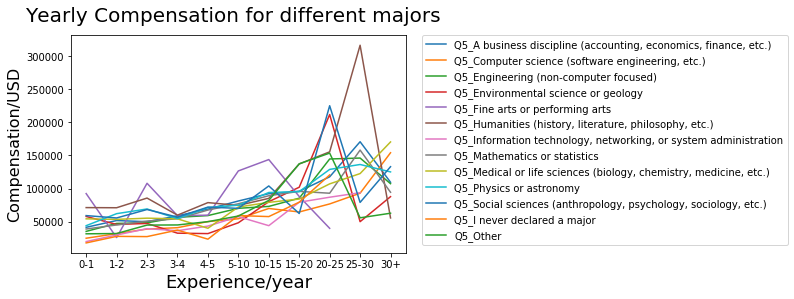

In [10]:
year_col = ['Q8_0-1', 'Q8_1-2','Q8_2-3', 'Q8_3-4', 'Q8_4-5', 'Q8_5-10', 'Q8_10-15', 'Q8_15-20', 'Q8_20-25', 'Q8_25-30', 'Q8_30 +']
year = ['0-1', '1-2','2-3', '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']


major_col = ['Q5_A business discipline (accounting, economics, finance, etc.)',  
         'Q5_Computer science (software engineering, etc.)' , 
         'Q5_Engineering (non-computer focused)',
         'Q5_Environmental science or geology',
         'Q5_Fine arts or performing arts',
         'Q5_Humanities (history, literature, philosophy, etc.)',
         'Q5_Information technology, networking, or system administration',
         'Q5_Mathematics or statistics',
         'Q5_Medical or life sciences (biology, chemistry, medicine, etc.)',
         'Q5_Physics or astronomy',
         'Q5_Social sciences (anthropology, psychology, sociology, etc.)', 
         'Q5_I never declared a major',
         'Q5_Other']

for col_1 in major_col:
    mean = []
    for col_2 in year_col:
        mean.append(newDF[(newDF[col_1] == 1) & (newDF[col_2] == 1)].loc[:, ['Q9']].mean())
    
    fig = plt.plot(year, mean, label = col_1)   
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Yearly Compensation for different majors', fontsize=20)
plt.xlabel('Experience/year', fontsize=18)
plt.ylabel('Compensation/USD', fontsize=16)
plt.show()

 ### Yearly Compensation for different genders
 - In this graph, I compare the compensation among different genders.
 - As shown in the pie chart, the gender distribution of participates is not balancing. Most of participates are males(color blue), while only appromiately $\frac{1}{6}$ of participates are females(blue color). Except those, very few people chose not to say and self-describe. 
 - The average compensation of male is 53668, which is over 13 percent higher than female. Since people who are able to access to this survey are those who have a certain understanding of data science, we could conclude that not only more males than females are interested or engaged in this field, but also they earn much more money than females.
 - Another interesting finding is that people perfer not to reveal their gender or want to self-defined have remarkable average income. Although those people only take a small part, they are excellent in working area and even better than most of people.

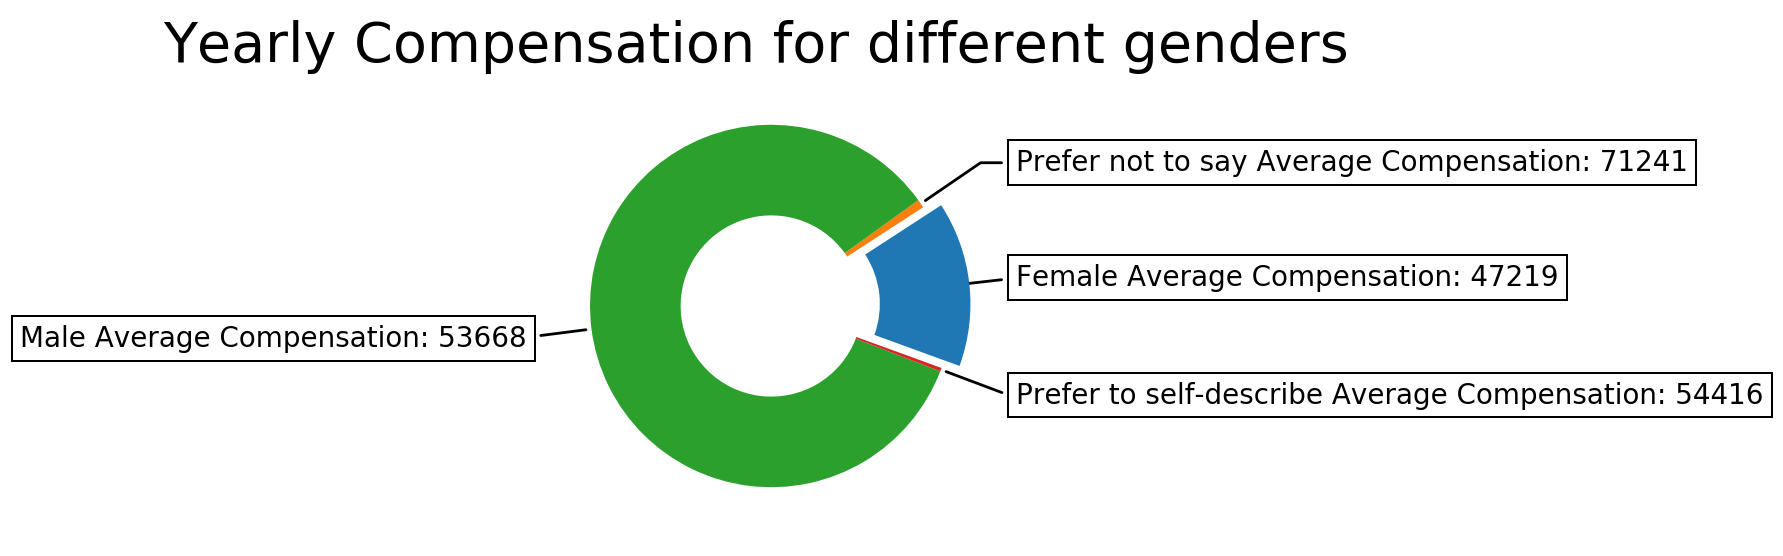

In [11]:
gender_col = ['Q1_Female','Q1_Prefer not to say','Q1_Male','Q1_Prefer to self-describe']
mean = []
cnt = []
for col in gender_col:
    mean.append(newDF[newDF[col] == 1].loc[:, ['Q9']].mean().values)
    cnt.append(newDF[newDF[col] == 1].shape[0])


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))    
labels = 'Female','Prefer not to say', 'Male', 'Prefer to self-describe'

explode = (0.1, 0, 0, 0)
wedges, texts = ax.pie(cnt, explode=explode, wedgeprops=dict(width=0.5), startangle=-20)
# fig1, ax1 = plt.subplots()
# wedges, texts = ax1.pie(cnt, explode=explode, autopct='%1.1f%%',wedgeprops=dict(width=0.5), textprops=dict(color="w"))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i] +' Average Compensation: '+str(int(mean[i])), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

plt.suptitle('Yearly Compensation for different genders', fontsize=20)
plt.show()
    

### Yearly Compensation for different programming languages
- I visualize this graph just out of curiosity. Because I have learned JAVA and python and I really want to know if those programming languages are profitable.
- However, the most frequently used language like JAVA, Python, R, C/C++ and JavaScript doesn't show a good performanace according to this survey. In contrast, Go, Julia, Scala and Ruby, which are kind of new to the field, show higher return. In my opinion, the reason is that those new programming languages are powerful in specified fields and have a great need for employees, while only few people master those skills and meet the market demand.

<BarContainer object of 18 artists>

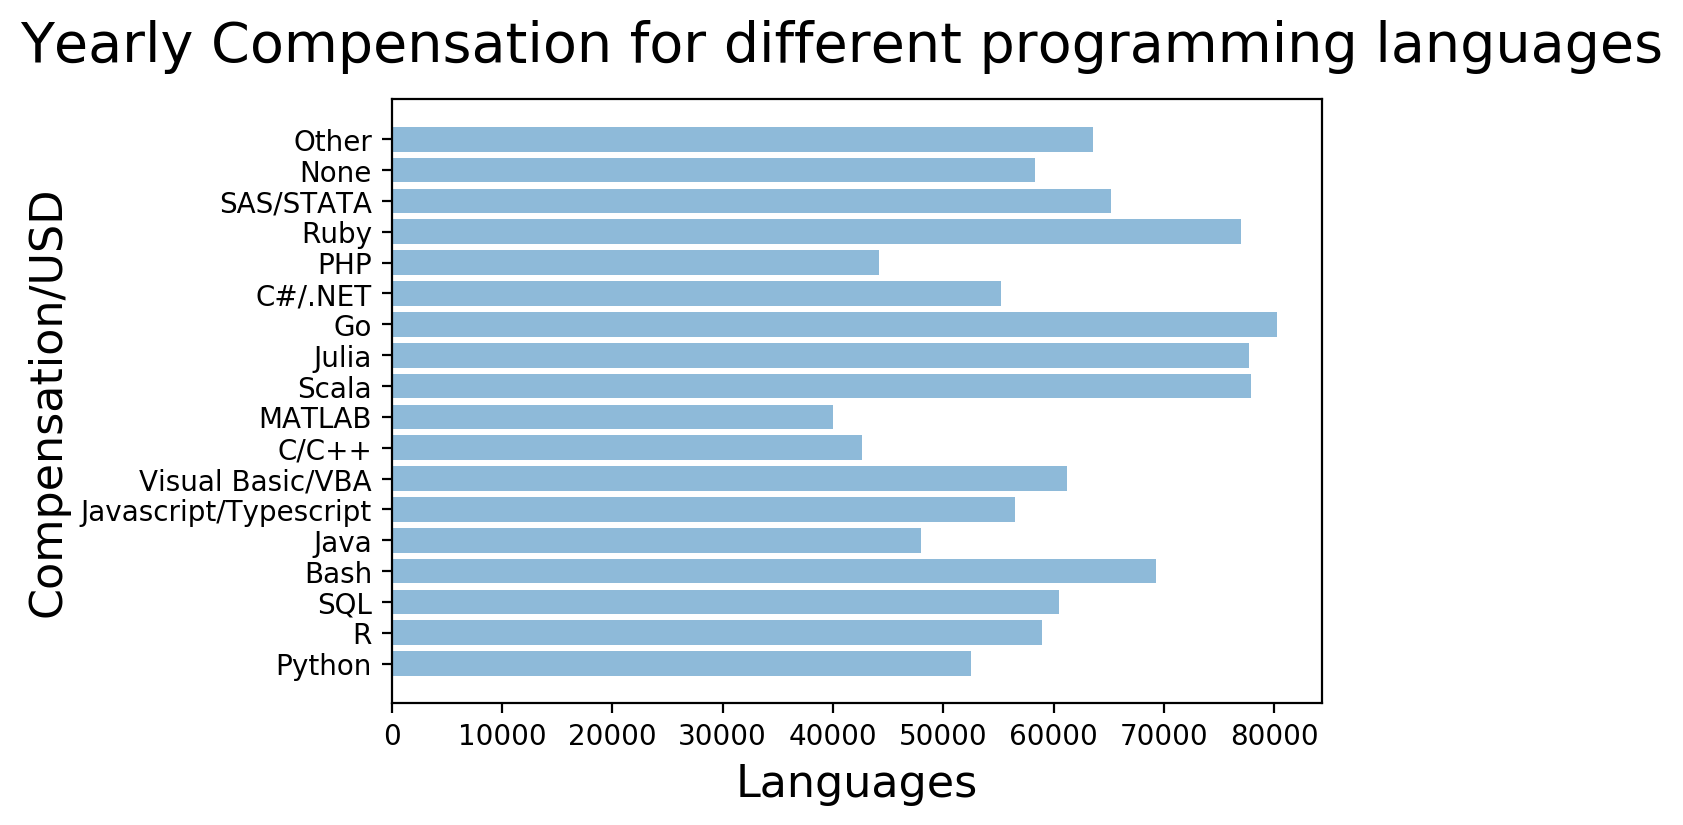

In [13]:
language_col = ['Q16_Part_1_Python', 'Q16_Part_2_R', 'Q16_Part_3_SQL', 'Q16_Part_4_Bash', 'Q16_Part_5_Java', 'Q16_Part_6_Javascript/Typescript', 'Q16_Part_7_Visual Basic/VBA', 'Q16_Part_8_C/C++', 'Q16_Part_9_MATLAB', 'Q16_Part_10_Scala', 'Q16_Part_11_Julia', 'Q16_Part_12_Go', 'Q16_Part_13_C#/.NET', 'Q16_Part_14_PHP', 'Q16_Part_15_Ruby', 'Q16_Part_16_SAS/STATA' , 'Q16_Part_17_None', 'Q16_Part_18_Other']
language = ['Python', 'R', 'SQL', 'Bash', 'Java', 'Javascript/Typescript', 'Visual Basic/VBA', 'C/C++', 'MATLAB', 'Scala', 'Julia', 'Go', 'C#/.NET', 'PHP', 'Ruby', 'SAS/STATA' , 'None', 'Other']

average = []
for col in language_col:
    average.append(newDF[newDF[col] == 1].loc[:, ['Q9']].mean().iloc[0])

plt.suptitle('Yearly Compensation for different programming languages', fontsize=20)
plt.xlabel('Languages', fontsize=16)
plt.ylabel('Compensation/USD', fontsize=16)
plt.barh(language, average, align='center', alpha=0.5)


### Visualize the order of feature importance
- Since there are over 600 features now and most of them are of litte importance, I have calculate the importance of all features by random forest regressor and only visualize the top 30 important features as following.
- As shown in the graph, there is no doubt that feature Q3_United_of_America, which mean the participant's region is US, is the most important feature for yearly compensation. US has the biggest market in the world and full of high-income job oppotunities.

In [14]:
X = newDF.drop(columns=['Q9'])
y = newDF["Q9"]

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0, n_estimators=100)
forest.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

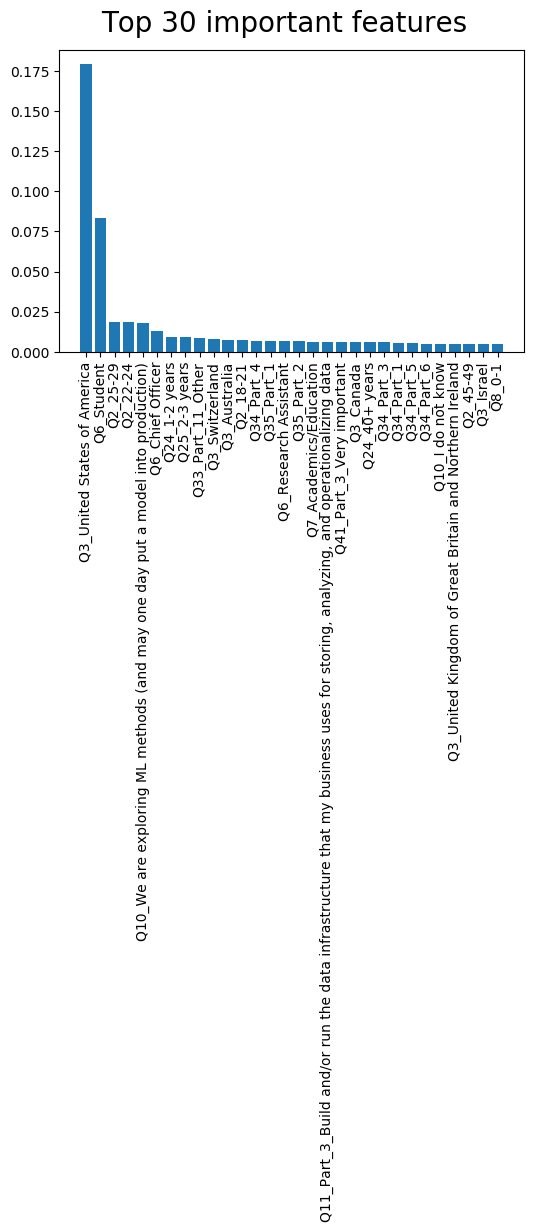

In [400]:
importances = forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [newDF.columns.values[i] for i in indices]

num = 30

# Create plot
plt.figure()

# Create plot title
plt.suptitle('Top 30 important features', fontsize=20)

importance = importances[indices][0:num]
# Add bars
plt.bar(range(num), importance)

# Add feature names as x-axis labels
plt.xticks(range(num), names[0:50], rotation=90)

# Show plot
plt.show()

- I also visualize the the correlationship between top 10 important features and target(Q9: yearly compensation)
- The result is easy to understand. People who are between 22 to 24 are most likely to be students or just begin to work. Also people between 25 to 29 are more likely to working 2 to 3 years than 1 to 2 years.
- Feature **[region is American]** has strong possitive relationship with compensation, while feature **[student] [age: 25-29] [age: 22-24]** has a negative relationship with compensation.

In [412]:
feature = names[0:10]
feature.append('Q9')
import seaborn as sns

# plt.matshow(newDF[feature].corr())
corr = newDF[feature].corr()
corr.style.background_gradient().set_precision(2)


,Q3_United States of America,Q6_Student,Q2_25-29,Q2_22-24,Q10_We are exploring ML methods (and may one day put a model into production),Q6_Chief Officer,Q24_1-2 years,Q25_2-3 years,Q33_Part_11_Other,Q3_Switzerland,Q9
Q3_United States of America,1,-0.037,-0.019,-0.055,-0.045,0.0086,-0.07,0.032,0.02,-0.048,0.42
Q6_Student,-0.037,1,-0.057,0.2,-0.018,-0.053,0.084,-0.069,-0.0098,0.0014,-0.28
Q2_25-29,-0.019,-0.057,1,-0.29,-0.014,-0.051,0.056,0.067,-0.0019,-0.0095,-0.12
Q2_22-24,-0.055,0.2,-0.29,1,0.024,-0.053,0.15,-0.023,-0.013,-0.015,-0.22
Q10_We are exploring ML methods (and may one day put a model into production),-0.045,-0.018,-0.014,0.024,1,0.017,0.048,-0.011,-0.02,-0.0069,-0.034
Q6_Chief Officer,0.0086,-0.053,-0.051,-0.053,0.017,1,-0.034,-0.00055,0.0092,0.0044,0.16
Q24_1-2 years,-0.07,0.084,0.056,0.15,0.048,-0.034,1,-0.06,0.0011,-0.0073,-0.17
Q25_2-3 years,0.032,-0.069,0.067,-0.023,-0.011,-0.00055,-0.06,1,0.004,-0.0029,0.061
Q33_Part_11_Other,0.02,-0.0098,-0.0019,-0.013,-0.02,0.0092,0.0011,0.004,1,0.016,0.0096
Q3_Switzerland,-0.048,0.0014,-0.0095,-0.015,-0.0069,0.0044,-0.0073,-0.0029,0.016,1,0.073


## Feature Selection
- In fact I have done some feature selection during data cleaning. I delete some meaningless feature and sperate categorical features into numeric features.
- However, I got 658 features after data cleaning, which is too large to deal with.


### Feature selection using LASSO
- First we use LASSO to select features.
- When using LASSO, the solution is more likely to be at the corner, which contains 0 in parameters and cause sparse matrix. If one feature get all zero, it would be deleted as feature selection.
- After LASSO, we have 360 features now.

In [422]:
X = newDF.drop(columns=['Q9']).values
y = newDF["Q9"].values

In [423]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV(cv=5)
sfm = SelectFromModel(clf, threshold=0.75)
sfm.fit(X, y)
X_transform = sfm.transform(X)

In [424]:
X_transform.shape

(11644, 360)

### Dimension reduction using PCA
- Since 360 is still large for computation, we use PCA to reduce dimensionality.
- PCA uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. Principal components will be sorted by weights and reveal essential information in the data.
- As shown in the graph, after taking components of PCA, the percentage reach 99 percent. It is more likely that the the components above 150 will have little impact on regression(85%).
- After PCA, we now have 150 feature selected.

In [434]:
from sklearn.decomposition import PCA, KernelPCA
num=360
variance=np.zeros((num,1))

for i in range(1,num):
    pca = PCA(n_components=i)
    X_trained = pca.fit_transform(X_transform, y=y)
    variance[i] = pca.explained_variance_ratio_.sum()
    
x = range(1,num+1)

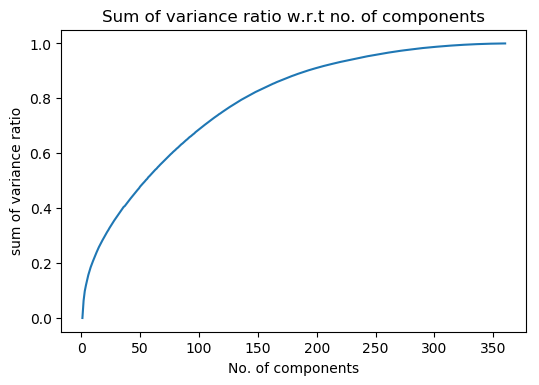

In [435]:
plt.plot(x, variance.reshape(num,1))
plt.xlabel("No. of components")
plt.ylabel("sum of variance ratio")
plt.title("Sum of variance ratio w.r.t no. of components")
plt.show()

In [269]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=150)
X_selected = pca.fit_transform(X_transform, y=y)

X_selected.shape

(11644, 150)

## Model Implementation
- In this step, we choose 4 different regression algorithms and fit the model with 10 fold cross-validaiton.
- The average and variance of accuracy for folds are shown as following.

In [270]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [271]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    matrix = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        acurr_train = np.absolute(r2_score(y_train, pred_train))
        acurr_test = np.absolute(r2_score(y_test, pred_test))

        bias = np.power(prediction.mean()-y_train,2).mean()
        variance = np.var(prediction)

        matrix.append((acurr_train, acurr_test, bias, variance))      

    df = pd.DataFrame(matrix,columns=['acurr_train','acurr_test','bias','variance'],index=range(1,11))

    print(df)

    print('The average of train acurracy: ', df['acurr_train'].mean())
    print('The variance of train acurracy: ', df['acurr_train'].var())
    print('The average of validation acurracy: ', df['acurr_test'].mean())
    print('The variance of validation acurracy: ', df['acurr_test'].var())


### 1. Linear Regression 
- What is Linear Regression?
    - Predict a value of a given continuous variable based on the values of other variables
    - Mutiple regression Model: $y=\beta_0+ \beta_1 x_1 + \beta_2 x_2 +\beta_3 x_3 +...+\beta_nx_n$
- pro
    - good predictor for linear model
    - extrapolation beyond a specific data set
- con
    - algorithm assumes data is normally distributed in real they are not(simplify the real world)
- why to chose?  
    - because it is the most famous regression algorithm
    - easy and quick to implement

In [275]:
from sklearn.linear_model import LinearRegression

clf_lr= LinearRegression()
cross_validation(clf_lr, X_train, y_train)

    acurr_train  acurr_test          bias      variance
1      0.445786    0.484905  3.791092e+09  2.076604e+09
2      0.448532    0.452870  3.752626e+09  2.076604e+09
3      0.451284    0.430050  3.663328e+09  2.076604e+09
4      0.445874    0.477002  3.721028e+09  2.076604e+09
5      0.443893    0.503811  3.779488e+09  2.076604e+09
6      0.459394    0.370987  3.647249e+09  2.076604e+09
7      0.450236    0.432413  3.818603e+09  2.076604e+09
8      0.451483    0.423505  3.764852e+09  2.076604e+09
9      0.460951    0.359615  3.630375e+09  2.076604e+09
10     0.456190    0.383248  3.720723e+09  2.076604e+09
The average of train acurracy:  0.4513623747872474
The variance of train acurracy:  3.40067937216525e-05
The average of test acurracy:  0.4318407188503116
The variance of test acurracy:  0.002425702226788128


### 2. Random Forest Regressor
- What is Random Forest Regressor?
    - develop many unrelated decision trees(low bias, high variance), by sampling on both columns and rows
    - The trees are made uncorrelated to maximize the decrease in variance, but the algorithm cannot reduce bias (which is slightly higher than the bias of an individual tree in the forest)
- pro
    - low bias
- con
    - high variance
    - not designed to work with very sparse features
- why to chose?  
    - random forests are able to capture non-linear interaction between the features and the target.

In [281]:
from sklearn.ensemble import RandomForestRegressor

clf_forest = RandomForestRegressor(random_state=0, n_estimators=100)
cross_validation(clf_forest, X_train, y_train)

    acurr_train  acurr_test          bias      variance
1      0.896818    0.311960  3.791092e+09  2.076604e+09
2      0.895231    0.295908  3.752626e+09  2.076604e+09
3      0.897384    0.259884  3.663328e+09  2.076604e+09
4      0.896849    0.308098  3.721028e+09  2.076604e+09
5      0.896989    0.298369  3.779488e+09  2.076604e+09
6      0.897573    0.226466  3.647249e+09  2.076604e+09
7      0.896704    0.291599  3.818603e+09  2.076604e+09
8      0.898023    0.273252  3.764852e+09  2.076604e+09
9      0.897460    0.237099  3.630375e+09  2.076604e+09
10     0.899740    0.257986  3.720723e+09  2.076604e+09
The average of train acurracy:  0.897276871354839
The variance of train acurracy:  1.3050087478199244e-06
The average of test acurracy:  0.2760620318226762
The variance of test acurracy:  0.000891340618210639


### 3. Gradient Boosting Regressor
- What is Linear Regression?
    - Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
- pro
    - low variance
- con
    - high bias
    - pretty slow because of the fact that trees are built sequentially
- why to chose?  
    - gradient boosted are able to capture non-linear interaction between the features and the target

In [291]:
from sklearn.ensemble import GradientBoostingRegressor

clf_gb= GradientBoostingRegressor()
cross_validation(clf_gb, X_train, y_train)

    acurr_train  acurr_test          bias      variance
1      0.548321    0.345868  3.791092e+09  2.076604e+09
2      0.542195    0.394206  3.752626e+09  2.076604e+09
3      0.551314    0.291336  3.663328e+09  2.076604e+09
4      0.544564    0.342919  3.721028e+09  2.076604e+09
5      0.541913    0.329690  3.779488e+09  2.076604e+09
6      0.555261    0.259879  3.647249e+09  2.076604e+09
7      0.547398    0.334828  3.818603e+09  2.076604e+09
8      0.551086    0.289776  3.764852e+09  2.076604e+09
9      0.552948    0.245222  3.630375e+09  2.076604e+09
10     0.552539    0.263828  3.720723e+09  2.076604e+09
The average of train acurracy:  0.5487539124413797
The variance of train acurracy:  2.173897327111786e-05
The average of test acurracy:  0.3097552608955456
The variance of test acurracy:  0.002229103751990027


### 4. LASSO
- What is LASSO?
    - Model: $\min_\beta||X\beta-y||_2^2 + \lambda||\beta_1|| $ 
    - a strong power method of regression analysis that performs regularization in order to enhance the prediction accuracy
    - the solution is more likely to be at the corner, which contains 0 in parameters and cause sparse matrix(using for feature selection)
- pro 
    - can also using for feature selection
    - easy to interpret
- con
    - select only one feature from a group of correlated features
- why to chose?  
    - LASSO does both parameter shrinkage and variable selection automatically, and the number of feature is large in this case

In [367]:
from sklearn.linear_model import Lasso

clf_lasso = Lasso()
cross_validation(clf_lasso, X_train, y_train)

    acurr_train  acurr_test          bias      variance
1      0.445786    0.484968  3.791092e+09  2.076604e+09
2      0.448532    0.452898  3.752626e+09  2.076604e+09
3      0.451284    0.430054  3.663328e+09  2.076604e+09
4      0.445874    0.476996  3.721028e+09  2.076604e+09
5      0.443893    0.503814  3.779488e+09  2.076604e+09
6      0.459394    0.370998  3.647249e+09  2.076604e+09
7      0.450236    0.432528  3.818603e+09  2.076604e+09
8      0.451483    0.423559  3.764852e+09  2.076604e+09
9      0.460950    0.359647  3.630375e+09  2.076604e+09
10     0.456190    0.383253  3.720723e+09  2.076604e+09
The average of train acurracy:  0.4513620967584928
The variance of train acurracy:  3.4006753347020134e-05
The average of test acurracy:  0.43187154393359917
The variance of test acurracy:  0.0024257630209593177


### Optimal model
- In conclusion, both **LASSO** and **Linear Regression** show the good proformance on both train accuracy(0.4513) and test accuracy(0.4318). The train accuracy is similar with test accuracy, which means the vriance of the model is low and there is no overfitting. It is possible to increase the accuracy by tuning hyperparameters.
- Although **Random Forest Regressor** show a high accuracy on training set(0.90), the accuracy on test set is only 0.27. It indicates that the model is overfitting.

## Model tuning

In [351]:
from IPython.display import display
def print_grid_search_attributes(model):
        # Estimator that gave highest score among all the estimators formed in GridSearch
        print('Best Estimator: ')
        print(model.best_estimator_)

        # parameters that gave best results while performing grid search
        print('\nBest parameters: ')
        print(model.best_params_)

        # Average cross validated score of the best estimator, from the Grid Search
        print('\nBest Score: ')
        print(model.best_score_)
        
        display(pd.DataFrame(model.grid_scores_))
        

In [347]:
from sklearn.model_selection import GridSearchCV
def parameter_tuning(model,parameter):
    model_grid = GridSearchCV(model, parameters, cv=10, scoring = 'r2')
    model_grid.fit(X_train, y_train)
    print_grid_search_attributes(model_grid)


 - For linear regression, there is no hyperparameter for tuning
 - For Random Forest Regressor, I tuning the hyperparameters of n_estimators and min_samples_split

In [356]:
clf_forest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [361]:
parameters = {'n_estimators': range(50,101,10),'min_samples_split': range(2,11,2) }
parameter_tuning(clf_forest,parameters)

Best Estimator: 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Best parameters: 
{'min_samples_split': 2, 'n_estimators': 100}

Best Score: 
0.2760620318226762


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'min_samples_split': 2, 'n_estimators': 50}",0.267674,"[0.301567579734469, 0.2729088845138462, 0.2515..."
1,"{'min_samples_split': 2, 'n_estimators': 60}",0.270035,"[0.30258441762868404, 0.27625295184764054, 0.2..."
2,"{'min_samples_split': 2, 'n_estimators': 70}",0.272957,"[0.30520951443690725, 0.280059929539357, 0.256..."
3,"{'min_samples_split': 2, 'n_estimators': 80}",0.274804,"[0.3121073589878306, 0.2851088945307918, 0.259..."
4,"{'min_samples_split': 2, 'n_estimators': 90}",0.275152,"[0.31296757915178197, 0.29048435371679227, 0.2..."
...,...,...,...
25,"{'min_samples_split': 10, 'n_estimators': 60}",0.268958,"[0.29381418508504653, 0.27910480867022236, 0.2..."
26,"{'min_samples_split': 10, 'n_estimators': 70}",0.271660,"[0.29988571422861987, 0.27906408058260046, 0.2..."
27,"{'min_samples_split': 10, 'n_estimators': 80}",0.273285,"[0.30878233286487233, 0.28164700960131384, 0.2..."
28,"{'min_samples_split': 10, 'n_estimators': 90}",0.273245,"[0.30823218378219186, 0.28852430282001773, 0.2..."


- Gradient Boosting Regressor
    - tuning parameters 'learning_rate':[0.1,0.15,0.20,0.25,0.30,0.35,0.40],'loss':['huber'], 'n_estimators':range(20,101,10), 'min_samples_split':[1000],'max_depth':[5]
    - acurracy shows a slightly improve 


In [363]:
clf_gb.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [364]:
parameters = {'learning_rate':[0.1,0.15,0.20,0.25,0.30,0.35,0.40],'loss':['huber'], 'n_estimators':range(20,101,10), 'min_samples_split':[1000],'max_depth':[5]}

parameter_tuning(clf_gb,parameters)

Best Estimator: 
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=1000,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

Best parameters: 
{'learning_rate': 0.25, 'loss': 'huber', 'max_depth': 5, 'min_samples_split': 1000, 'n_estimators': 100}

Best Score: 
0.36339185361015514


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.200979,"[0.2218058840515411, 0.2287006183254543, 0.176..."
1,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.237772,"[0.2650929163114728, 0.2661487302558284, 0.211..."
2,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.262807,"[0.29189788280647677, 0.29643629710931474, 0.2..."
3,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.280776,"[0.31409935656490584, 0.31240189341193236, 0.2..."
4,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",0.294477,"[0.3304804951960997, 0.3258952481903574, 0.269..."
...,...,...,...
58,"{'learning_rate': 0.4, 'loss': 'huber', 'max_d...",0.338297,"[0.3872178328000109, 0.3690669869637445, 0.327..."
59,"{'learning_rate': 0.4, 'loss': 'huber', 'max_d...",0.341718,"[0.3909394170212397, 0.37468936327224445, 0.32..."
60,"{'learning_rate': 0.4, 'loss': 'huber', 'max_d...",0.344828,"[0.39475121960137605, 0.3729575051686743, 0.33..."
61,"{'learning_rate': 0.4, 'loss': 'huber', 'max_d...",0.345187,"[0.3950730792472623, 0.3736876266546796, 0.340..."


- LASSO 
    - tuning alpha while no obvious improvement

In [416]:
parameters = {'alpha':[0.0001,0.001,0.01,0.05,0.1,1]}
parameter_tuning(clf_lasso,parameters)

Best Estimator: 
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Best parameters: 
{'alpha': 1}

Best Score: 
0.4318715439335992


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,{'alpha': 0.0001},0.431841,"[0.48490508070370186, 0.4528705007242537, 0.43..."
1,{'alpha': 0.001},0.431841,"[0.4849051380557249, 0.4528705261843965, 0.430..."
2,{'alpha': 0.01},0.431841,"[0.4849057118261124, 0.452870780716803, 0.4300..."
3,{'alpha': 0.05},0.431842,"[0.48490825945732274, 0.4528719111145272, 0.43..."
4,{'alpha': 0.1},0.431844,"[0.4849114423851677, 0.4528733226781605, 0.430..."
5,{'alpha': 1},0.431872,"[0.48496792795687094, 0.45289845664022843, 0.4..."


## Testing and Discussion

In [429]:
clf_optimal = Lasso(alpha = 1)
clf_optimal.fit(X_train, y_train)

acurr = clf_optimal.score(X_test,y_test)
print('Opitimal model LASSO accuracy on testing set is ' + str(acurr))

Opitimal model LASSO accuracy on testing set is 0.44189904692277093


 - When training model using cross validation, the average acurracy of training set and validation set on 10 fold are 0.4513 and 0.4318 respectively(scoring method is r2)
 - Applying the model on testing set, the accuracy is 0.4418
 - The test accuracy is a little bit lower than train accuracy and a little bit higher than validation accuracy
 - We could improve accuracy by improving alpha of the model and using more features(without PCA but slow speed)
 - The model is not overfitting, since the acurracy of testing is just a little lower than the acurracy of training. In this sense, the model's performance is consistent on both training and testing, which nor describe the random error in training set or insufficently describe the data.
 - The model might still be kind of underfittig since the performance on both training set and testing set is not as good as expectation. There is still some important information that is not explained be the model.
